In [2]:
from __future__ import print_function
from __future__ import division

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [3]:
# URL pro raw csv que ta no git
url_bom = './datasets/oficial/mov_bom/david/myo-movimento-david-2019-06-14 10:20:51-.csv'
# Dataset is now stored in a Pandas Dataframe
url_ruim = './datasets/oficial/mov_ruim/david/myo-movimento-david-ruim-2019-06-14 10:41:12-.csv'

#Pandas dataset
Dataset_bom = pd.read_csv(url_bom)
Dataset_ruim = pd.read_csv(url_ruim)


In [4]:
def apply_fft(data, comment):
    plt.figure(figsize=(15,8))
    plt.title('FFT - ' + comment, fontsize=30)
    plt.xlabel('Frequência', fontsize=20)
    plt.ylabel('Amplitude', fontsize=20)
    plt.plot(abs(np.fft.rfft(data)))
    plt.xlim(0, 200)
    plt.grid()
    plt.show()

In [36]:
# Normalização das frequencias: https://stackoverflow.com/questions/31736839/python-bandpass-filter-singular-matrix-error
# Função do filtro https://stackoverflow.com/questions/44251232/audio-buffer-finite-error-after-butter-filtering-scipy

import scipy as sp
from scipy import signal

# 500 amostras a uma frequencia de 200hz
# tempo = 500/200 = 2,5 segundos
# intervalo entre as amostras = 2.5/500 = 0,005

#time = np.arange(0, 2.5, 0.005)

def filteremg(time, emg, sfreq=200, high_band=72, mid_band=58, low_band=5):
    """
    time: Time data
    emg: EMG data
    high: high-pass cut off frequency
    low: low-pass cut off frequency
    sfreq: sampling frequency
    """
    # normalise cut-off frequencies to sampling frequency
    high_band = high_band/(sfreq/2)
    mid_band = mid_band/(sfreq/2)
    print(high_band, mid_band)

    # create second bandpass filter for EMG
    #b1, a1 = sp.signal.butter(2, [mid_band, high_band], btype='bandstop')
    #emg_filtered2 = sp.signal.filtfilt(b1, a1, emg_filtered)
    sos = sp.signal.butter(2, [mid_band, high_band], btype='bandstop', output='sos')
    emg_filtered2 = sp.signal.sosfilt(sos, emg)

    plt.subplot(1, 3, 3)
    plt.subplot(1, 3, 3).set_title('Filtered 2nd bandpass')
    plt.plot(time, emg_filtered2)
    plt.locator_params(axis='x', nbins=4)
    plt.locator_params(axis='y', nbins=4)
    plt.ylim(-1, 1)
    plt.xlabel('Time (sec)')
    
    
    return emg_filtered2


0.7164179104477612 0.5771144278606966


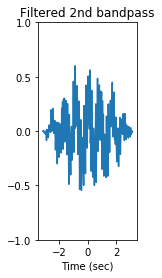

In [50]:
Fs = 201
f = 10
sample = 201
x = np.arange(sample)
y1 = np.sin(2 * np.pi * 30 * x / Fs)
y2 = np.sin(2 * np.pi * 58* x / Fs)
y3 = np.sin(2 * np.pi * 80 * x / Fs)
y4 = np.sin(2 * np.pi * 100 * x / Fs)
y=y1*y2*y3*y4

emg_filtered_all_bom = filteremg(time, y, low_band=5, mid_band=58, high_band=72, sfreq=201)

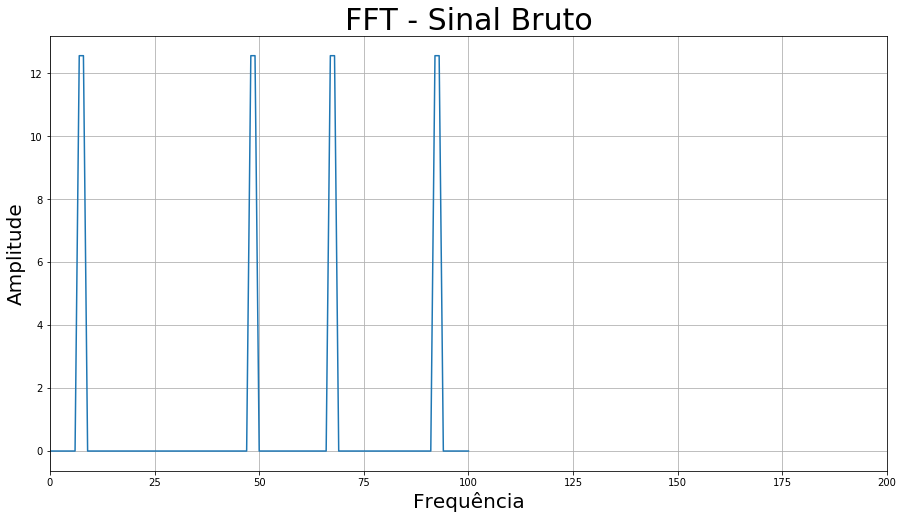

In [51]:
apply_fft(y, comment = 'Sinal Bruto')

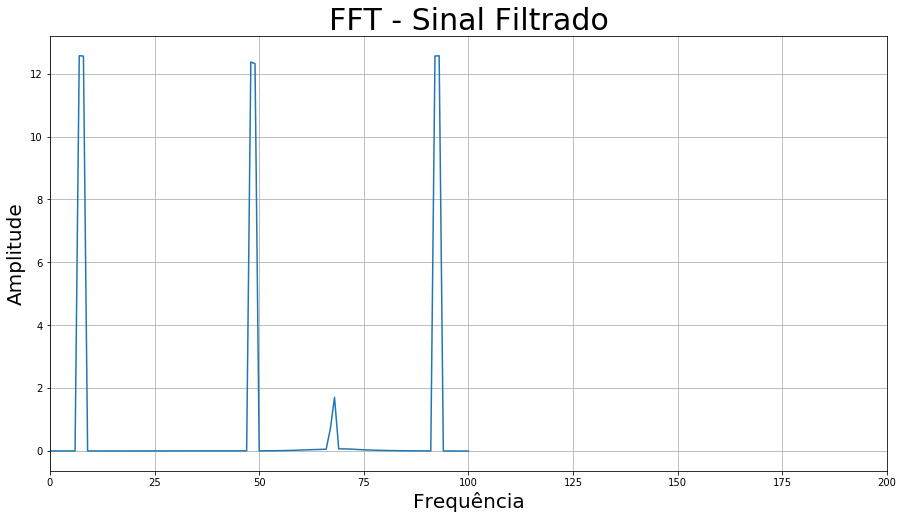

In [52]:
apply_fft(emg_filtered_all_bom, comment = 'Sinal Filtrado')